In [883]:
import pandas as pd
import os

In [884]:
pwd = os.getcwd()

In [885]:
mb = pd.read_csv(pwd + '/Data - Map Banned.csv', usecols=['Map','Total']).iloc[1:]
mp = pd.read_csv(pwd + '/Data - Map Picked.csv', usecols=['Map','Total'])
ps = pd.read_csv(pwd + '/Data - Player Statistics.csv')
ss = pd.read_csv(pwd + '/Data - Side Statistics.csv')


In [886]:
mb

,Map,Total
1,Ascent,18
2,Bind,15
3,Fracture,29
4,Haven,22
5,Lotus,18
6,Pearl,18
7,Split,12


In [887]:
mp

,Map,Total
0,Ascent,16
1,Bind,19
2,Fracture,5
3,Haven,12
4,Lotus,16
5,Pearl,16
6,Split,22


In [888]:
ps.head()

,Player,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
0,Keznit,Chile,KRÜ Esports,"['Raze', 'Jett']",4,79,70,21,1.12,1.42,266,19.7,17.5,5.2
1,Whz,China,Bilibili Gaming,"['Raze', 'Jett']",11,212,181,41,1.17,1.39,254,19.2,16.4,3.7
2,Demon1,United States,Evil Geniuses,"['Jett', 'Astra', 'Chamber']",21,421,302,80,1.39,1.65,246,20.0,14.3,3.8
3,Aspas,Brazil,LOUD,"['Raze', 'Jett']",24,446,355,82,1.25,1.48,235,18.5,14.7,3.4
4,Jinggg,Singapore,Paper Rex,"['Raze', 'Phoenix']",16,285,279,92,1.02,1.35,234,17.8,17.4,5.7


In [889]:
ss

,Map,Atk Wins,Def Wins
0,Ascent,145,138
1,Bind,157,183
2,Fracture,51,53
3,Haven,107,109
4,Lotus,151,123
5,Pearl,149,151
6,Split,178,138


In [890]:
map_data = pd.merge(mp,mb, on='Map')
map_data = pd.merge(map_data,ss, on='Map')
map_data

,Map,Total_x,Total_y,Atk Wins,Def Wins
0,Ascent,16,18,145,138
1,Bind,19,15,157,183
2,Fracture,5,29,51,53
3,Haven,12,22,107,109
4,Lotus,16,18,151,123
5,Pearl,16,18,149,151
6,Split,22,12,178,138


In [891]:
map_data=map_data.rename(columns={'Total_x': 'Picked','Total_y':'Banned'})
map_data

,Map,Picked,Banned,Atk Wins,Def Wins
0,Ascent,16,18,145,138
1,Bind,19,15,157,183
2,Fracture,5,29,51,53
3,Haven,12,22,107,109
4,Lotus,16,18,151,123
5,Pearl,16,18,149,151
6,Split,22,12,178,138


In [892]:
import matplotlib.pyplot as plt
import seaborn as sns

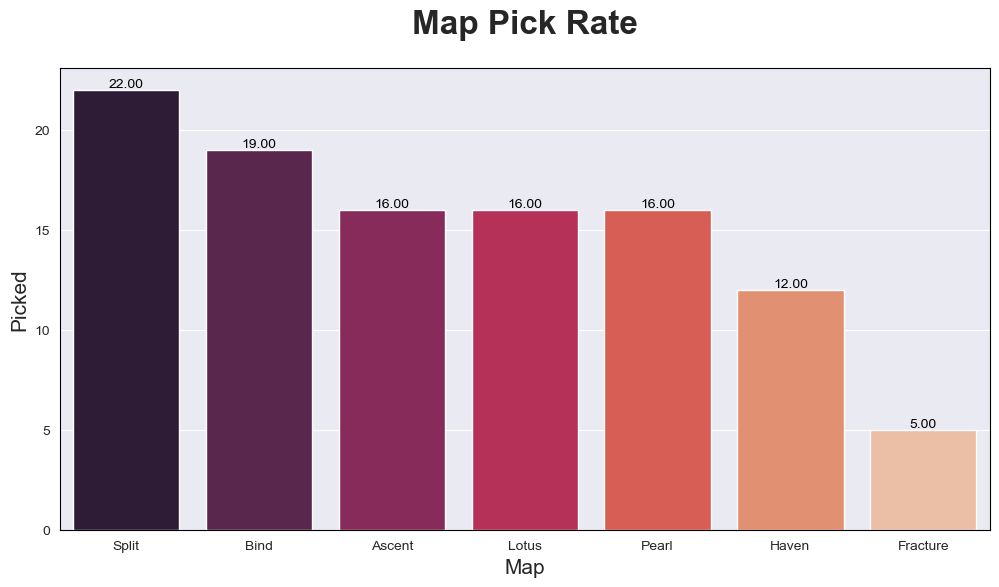

        Map  Picked
0     Split      22
1      Bind      19
2    Ascent      16
3     Lotus      16
4     Pearl      16
5     Haven      12
6  Fracture       5


In [893]:
plt.figure(figsize=(12,6))

custom = {"axes.edgecolor": "BLACK",}
sns.set_style('darkgrid',custom)
ax =  sns.barplot(data= map_data.sort_values(by='Picked',ascending=False),
            x='Map',y='Picked', width=.8, palette= 'rocket')


plt.title('Map Pick Rate', pad=25, weight= 'bold', fontsize= 24)
plt.xlabel('Map', size=15)
plt.ylabel('Picked', size=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', color='black')

plt.savefig('map picked.jpg')
plt.show()
picked_map = (map_data[['Map','Picked']].sort_values(by='Picked', 
                        ascending=False).reset_index(drop=True))

print(picked_map)

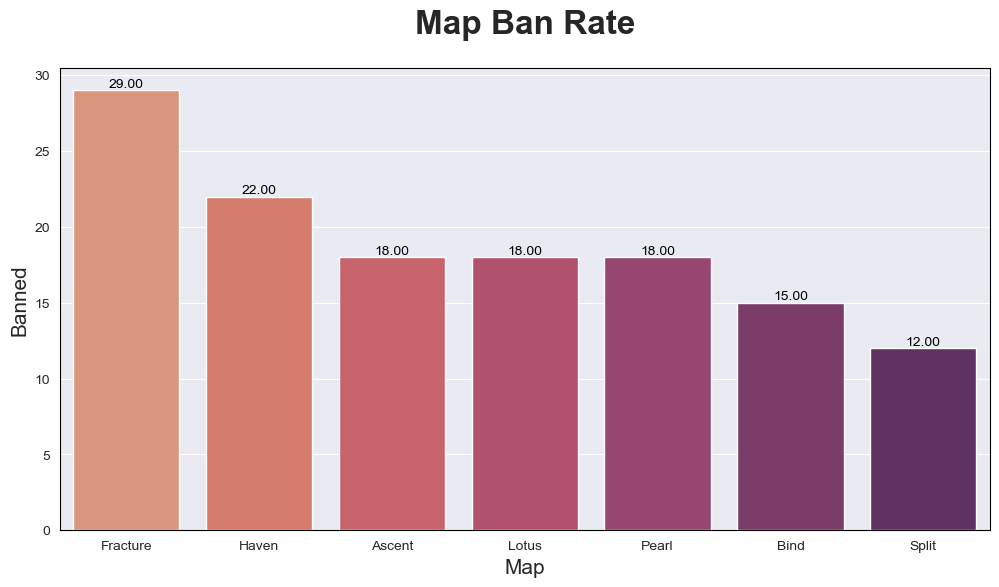

        Map  Banned
0  Fracture      29
1     Haven      22
2    Ascent      18
3     Lotus      18
4     Pearl      18
5      Bind      15
6     Split      12


In [894]:
plt.figure(figsize=(12,6))
custom = {"axes.edgecolor": "BLACK",}
sns.set_style('darkgrid',custom)
ax = sns.barplot(data= map_data.sort_values(by='Banned', ascending=False),
            x='Map',y='Banned', width=.8, palette= 'flare')


plt.title('Map Ban Rate', pad=25, weight= 'bold', fontsize= 24)
plt.xlabel('Map', size=15)
plt.ylabel('Banned', size=15)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', color='black')

plt.savefig('map banned.jpg')                                                
plt.show()
banned_map = (map_data[['Map','Banned']].sort_values(by='Banned', 
                        ascending=False).reset_index(drop=True))

print(banned_map)

In [895]:
ps.head()

,Player,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
0,Keznit,Chile,KRÜ Esports,"['Raze', 'Jett']",4,79,70,21,1.12,1.42,266,19.7,17.5,5.2
1,Whz,China,Bilibili Gaming,"['Raze', 'Jett']",11,212,181,41,1.17,1.39,254,19.2,16.4,3.7
2,Demon1,United States,Evil Geniuses,"['Jett', 'Astra', 'Chamber']",21,421,302,80,1.39,1.65,246,20.0,14.3,3.8
3,Aspas,Brazil,LOUD,"['Raze', 'Jett']",24,446,355,82,1.25,1.48,235,18.5,14.7,3.4
4,Jinggg,Singapore,Paper Rex,"['Raze', 'Phoenix']",16,285,279,92,1.02,1.35,234,17.8,17.4,5.7


In [896]:
ps.dtypes

Player      object
Country     object
Team        object
Agents      object
Maps         int64
K            int64
D            int64
A            int64
KD         float64
KDA        float64
ACS/Map      int64
K/Map      float64
D/Map      float64
A/Map      float64
dtype: object

In [897]:
agents = ps.Agents.astype(str)
agents = agents.str.split(",", expand = True)
agents.head()

,0,1,2
0,['Raze','Jett'],None
1,['Raze','Jett'],None
2,['Jett','Astra','Chamber']
3,['Raze','Jett'],None
4,['Raze','Phoenix'],None


In [898]:
agents.rename(columns={0:'1', 1:'2', 2:'3'},inplace=True)
agents.head()

,1,2,3
0,['Raze','Jett'],None
1,['Raze','Jett'],None
2,['Jett','Astra','Chamber']
3,['Raze','Jett'],None
4,['Raze','Phoenix'],None


In [899]:
import re

In [900]:
def remove_unnecessary_brackets(x):
    if pd.notna(x):
        return re.sub(r'\[|\]', '', x)
    else:
        return x
agents['1'] = agents['1'].apply((remove_unnecessary_brackets))
agents['2'] = agents['2'].apply((remove_unnecessary_brackets))
agents['3'] = agents['3'].apply((remove_unnecessary_brackets))
agents.head()

,1,2,3
0,'Raze','Jett',None
1,'Raze','Jett',None
2,'Jett','Astra','Chamber'
3,'Raze','Jett',None
4,'Raze','Phoenix',None


In [901]:
agents['1'] = agents['1'].str.replace("'", "")
agents['2'] = agents['2'].str.replace("'", "")
agents['3'] = agents['3'].str.replace("'", "")

In [902]:
import numpy as np

In [903]:
agents = agents.replace({None: np.nan})

In [904]:
joined = [ps, agents]


In [905]:
statistics = pd.concat(joined, axis=1)
statistics.head()

,Player,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,1,2,3
0,Keznit,Chile,KRÜ Esports,"['Raze', 'Jett']",4,79,70,21,1.12,1.42,266,19.7,17.5,5.2,Raze,Jett,NaN
1,Whz,China,Bilibili Gaming,"['Raze', 'Jett']",11,212,181,41,1.17,1.39,254,19.2,16.4,3.7,Raze,Jett,NaN
2,Demon1,United States,Evil Geniuses,"['Jett', 'Astra', 'Chamber']",21,421,302,80,1.39,1.65,246,20.0,14.3,3.8,Jett,Astra,Chamber
3,Aspas,Brazil,LOUD,"['Raze', 'Jett']",24,446,355,82,1.25,1.48,235,18.5,14.7,3.4,Raze,Jett,NaN
4,Jinggg,Singapore,Paper Rex,"['Raze', 'Phoenix']",16,285,279,92,1.02,1.35,234,17.8,17.4,5.7,Raze,Phoenix,NaN


In [906]:
statistics = statistics.rename(columns={'1':'Agent 1', '2':'Agent 2', '3':'Agent 3'})
statistics.head()

,Player,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Agent 1,Agent 2,Agent 3
0,Keznit,Chile,KRÜ Esports,"['Raze', 'Jett']",4,79,70,21,1.12,1.42,266,19.7,17.5,5.2,Raze,Jett,NaN
1,Whz,China,Bilibili Gaming,"['Raze', 'Jett']",11,212,181,41,1.17,1.39,254,19.2,16.4,3.7,Raze,Jett,NaN
2,Demon1,United States,Evil Geniuses,"['Jett', 'Astra', 'Chamber']",21,421,302,80,1.39,1.65,246,20.0,14.3,3.8,Jett,Astra,Chamber
3,Aspas,Brazil,LOUD,"['Raze', 'Jett']",24,446,355,82,1.25,1.48,235,18.5,14.7,3.4,Raze,Jett,NaN
4,Jinggg,Singapore,Paper Rex,"['Raze', 'Phoenix']",16,285,279,92,1.02,1.35,234,17.8,17.4,5.7,Raze,Phoenix,NaN


In [907]:
del statistics['Agents']
statistics.head()

,Player,Country,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Agent 1,Agent 2,Agent 3
0,Keznit,Chile,KRÜ Esports,4,79,70,21,1.12,1.42,266,19.7,17.5,5.2,Raze,Jett,NaN
1,Whz,China,Bilibili Gaming,11,212,181,41,1.17,1.39,254,19.2,16.4,3.7,Raze,Jett,NaN
2,Demon1,United States,Evil Geniuses,21,421,302,80,1.39,1.65,246,20.0,14.3,3.8,Jett,Astra,Chamber
3,Aspas,Brazil,LOUD,24,446,355,82,1.25,1.48,235,18.5,14.7,3.4,Raze,Jett,NaN
4,Jinggg,Singapore,Paper Rex,16,285,279,92,1.02,1.35,234,17.8,17.4,5.7,Raze,Phoenix,NaN


In [908]:
statistics.to_csv('Edited Data - Player Statistics.csv',index=False)